In [1]:
import pandas as pd
df=pd.read_csv("../data/Bitcoin_price.csv")
df=df.drop(columns="Unnamed: 0",axis=1)#удаляем лишний столбец с индексами
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Aug 27, 2024","62,856.59","63,196.90","62,621.34","62,621.34","62,621.34","27,863,764,992"
1,"Aug 26, 2024","64,342.23","64,489.71","62,849.56","62,880.66","62,880.66","27,682,040,631"
2,"Aug 25, 2024","64,176.37","64,996.42","63,833.52","64,333.54","64,333.54","18,827,683,555"
3,"Aug 24, 2024","64,103.87","64,513.79","63,619.92","64,178.99","64,178.99","21,430,585,163"
4,"Aug 23, 2024","60,380.95","64,947.06","60,372.05","64,094.36","64,094.36","42,530,509,233"
...,...,...,...,...,...,...,...
3628,"Sep 21, 2014",408.08,412.43,393.18,398.82,398.82,"26,580,100"
3629,"Sep 20, 2014",394.67,423.30,389.88,408.90,408.90,"36,863,600"
3630,"Sep 19, 2014",424.10,427.83,384.53,394.80,394.80,"37,919,700"
3631,"Sep 18, 2014",456.86,456.86,413.10,424.44,424.44,"34,483,200"


In [2]:
#fix date column
df["Date"]=pd.to_datetime(df['Date'], format='%b %d, %Y')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,2024-08-27,"62,856.59","63,196.90","62,621.34","62,621.34","62,621.34","27,863,764,992",27,8,2024
1,2024-08-26,"64,342.23","64,489.71","62,849.56","62,880.66","62,880.66","27,682,040,631",26,8,2024
2,2024-08-25,"64,176.37","64,996.42","63,833.52","64,333.54","64,333.54","18,827,683,555",25,8,2024
3,2024-08-24,"64,103.87","64,513.79","63,619.92","64,178.99","64,178.99","21,430,585,163",24,8,2024
4,2024-08-23,"60,380.95","64,947.06","60,372.05","64,094.36","64,094.36","42,530,509,233",23,8,2024
...,...,...,...,...,...,...,...,...,...,...
3628,2014-09-21,408.08,412.43,393.18,398.82,398.82,"26,580,100",21,9,2014
3629,2014-09-20,394.67,423.30,389.88,408.90,408.90,"36,863,600",20,9,2014
3630,2014-09-19,424.10,427.83,384.53,394.80,394.80,"37,919,700",19,9,2014
3631,2014-09-18,456.86,456.86,413.10,424.44,424.44,"34,483,200",18,9,2014


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3633 non-null   datetime64[ns]
 1   Open       3633 non-null   object        
 2   High       3633 non-null   object        
 3   Low        3633 non-null   object        
 4   Close      3633 non-null   object        
 5   Adj Close  3633 non-null   object        
 6   Volume     3633 non-null   object        
 7   Day        3633 non-null   int32         
 8   Month      3633 non-null   int32         
 9   Year       3633 non-null   int32         
dtypes: datetime64[ns](1), int32(3), object(6)
memory usage: 241.4+ KB


In [4]:
#delete commas
for i in range (1,df.shape[1]-3):
    df.iloc[:,i]=df.iloc[:,i].str.replace(',','')

In [5]:
columns=df.columns
columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Day',
       'Month', 'Year'],
      dtype='object')

In [6]:
#make numeric type
for column in columns[1:]:
    df[f"{column}"]=pd.to_numeric(df[f"{column}"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3633 non-null   datetime64[ns]
 1   Open       3633 non-null   float64       
 2   High       3633 non-null   float64       
 3   Low        3633 non-null   float64       
 4   Close      3633 non-null   float64       
 5   Adj Close  3633 non-null   float64       
 6   Volume     3633 non-null   int64         
 7   Day        3633 non-null   int32         
 8   Month      3633 non-null   int32         
 9   Year       3633 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(1)
memory usage: 241.4 KB


<Axes: xlabel='Date'>

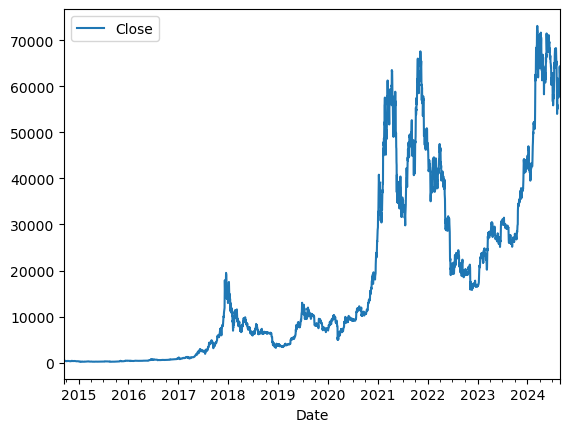

In [8]:
df.plot.line(x='Date',y="Close")

In [8]:
price=df.drop(columns=['Day','Month','Year']).copy()
price=price.iloc[::-1].reset_index(drop=True)
price

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.86,468.17,452.42,457.33,457.33,21056800
1,2014-09-18,456.86,456.86,413.10,424.44,424.44,34483200
2,2014-09-19,424.10,427.83,384.53,394.80,394.80,37919700
3,2014-09-20,394.67,423.30,389.88,408.90,408.90,36863600
4,2014-09-21,408.08,412.43,393.18,398.82,398.82,26580100
...,...,...,...,...,...,...,...
3628,2024-08-23,60380.95,64947.06,60372.05,64094.36,64094.36,42530509233
3629,2024-08-24,64103.87,64513.79,63619.92,64178.99,64178.99,21430585163
3630,2024-08-25,64176.37,64996.42,63833.52,64333.54,64333.54,18827683555
3631,2024-08-26,64342.23,64489.71,62849.56,62880.66,62880.66,27682040631


In [9]:
(price["Close"]==price["Adj Close"]).sum()
#same columns

3633

In [10]:
price=price.drop(columns=["Adj Close"])
price

,Date,Open,High,Low,Close,Volume
0,2014-09-17,465.86,468.17,452.42,457.33,21056800
1,2014-09-18,456.86,456.86,413.10,424.44,34483200
2,2014-09-19,424.10,427.83,384.53,394.80,37919700
3,2014-09-20,394.67,423.30,389.88,408.90,36863600
4,2014-09-21,408.08,412.43,393.18,398.82,26580100
...,...,...,...,...,...,...
3628,2024-08-23,60380.95,64947.06,60372.05,64094.36,42530509233
3629,2024-08-24,64103.87,64513.79,63619.92,64178.99,21430585163
3630,2024-08-25,64176.37,64996.42,63833.52,64333.54,18827683555
3631,2024-08-26,64342.23,64489.71,62849.56,62880.66,27682040631


Сделаем таргет. 
Тк у нас задача классификации,то нам нужно получить бинарные значения.Для этого посмотрим стала ли цена больше на следующий день(класс 1)
или меньше (класс 0)

In [11]:
price["Tomorrow"]=price["Close"].shift(-1)

In [12]:
price["Target"]=(price["Close"]<price["Tomorrow"]).astype(int)

In [13]:
price

,Date,Open,High,Low,Close,Volume,Tomorrow,Target
0,2014-09-17,465.86,468.17,452.42,457.33,21056800,424.44,0
1,2014-09-18,456.86,456.86,413.10,424.44,34483200,394.80,0
2,2014-09-19,424.10,427.83,384.53,394.80,37919700,408.90,1
3,2014-09-20,394.67,423.30,389.88,408.90,36863600,398.82,0
4,2014-09-21,408.08,412.43,393.18,398.82,26580100,402.15,1
...,...,...,...,...,...,...,...,...
3628,2024-08-23,60380.95,64947.06,60372.05,64094.36,42530509233,64178.99,1
3629,2024-08-24,64103.87,64513.79,63619.92,64178.99,21430585163,64333.54,1
3630,2024-08-25,64176.37,64996.42,63833.52,64333.54,18827683555,62880.66,0
3631,2024-08-26,64342.23,64489.71,62849.56,62880.66,27682040631,62621.34,0


In [14]:
import numpy as np

In [15]:
for column in price.columns[1:]:
    price[f"{column}"]=pd.to_numeric(price[f"{column}"])

In [16]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3633 non-null   datetime64[ns]
 1   Open      3633 non-null   float64       
 2   High      3633 non-null   float64       
 3   Low       3633 non-null   float64       
 4   Close     3633 non-null   float64       
 5   Volume    3633 non-null   int64         
 6   Tomorrow  3632 non-null   float64       
 7   Target    3633 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1)
memory usage: 213.0 KB


Добавим колонку изменения в процентах.Для этого перевернем датафрейм

In [17]:
price["Change"]=np.round(price["Close"].pct_change()*100,2)

In [18]:
price=price[['Date','Open','High','Low','Close','Volume','Tomorrow','Change','Target']]
price=price.dropna()

In [19]:
price

,Date,Open,High,Low,Close,Volume,Tomorrow,Change,Target
1,2014-09-18,456.86,456.86,413.10,424.44,34483200,394.80,-7.19,0
2,2014-09-19,424.10,427.83,384.53,394.80,37919700,408.90,-6.98,1
3,2014-09-20,394.67,423.30,389.88,408.90,36863600,398.82,3.57,0
4,2014-09-21,408.08,412.43,393.18,398.82,26580100,402.15,-2.47,1
5,2014-09-22,399.10,406.92,397.13,402.15,24127600,435.79,0.83,1
...,...,...,...,...,...,...,...,...,...
3627,2024-08-22,61168.32,61408.11,59815.25,60381.91,27625734377,64094.36,-1.30,1
3628,2024-08-23,60380.95,64947.06,60372.05,64094.36,42530509233,64178.99,6.15,1
3629,2024-08-24,64103.87,64513.79,63619.92,64178.99,21430585163,64333.54,0.13,1
3630,2024-08-25,64176.37,64996.42,63833.52,64333.54,18827683555,62880.66,0.24,0


In [20]:
X=price.drop(columns=['Target','Date','Tomorrow'])
y=price.Target

Логистическая регрессия

Добавим столбцы с изменением цены на несколько дней вперед для каждой строки и сделаем признаки одной масштабности

In [44]:
log_price=price.drop(columns=['Open','High','Low','Close','Tomorrow']).copy()
log_price

,Date,Volume,Change,Target
1,2014-09-18,34483200,-7.19,0
2,2014-09-19,37919700,-6.98,1
3,2014-09-20,36863600,3.57,0
4,2014-09-21,26580100,-2.47,1
5,2014-09-22,24127600,0.83,1
...,...,...,...,...
3627,2024-08-22,27625734377,-1.30,1
3628,2024-08-23,42530509233,6.15,1
3629,2024-08-24,21430585163,0.13,1
3630,2024-08-25,18827683555,0.24,0


In [46]:
for i in range(1,6):
    log_price["Day_"+str(i)]=log_price["Change"].shift(i)

In [48]:
log_price['Volume']=np.round(log_price['Volume']/1000_000_0000,5)

In [50]:
log_price=log_price.dropna()

In [52]:
log_price

,Date,Volume,Change,Target,Day_1,Day_2,Day_3,Day_4,Day_5
6,2014-09-23,0.00451,8.37,0,0.83,-2.47,3.57,-6.98,-7.19
7,2014-09-24,0.00306,-2.89,0,8.37,0.83,-2.47,3.57,-6.98
8,2014-09-25,0.00268,-2.75,0,-2.89,8.37,0.83,-2.47,3.57
9,2014-09-26,0.00215,-1.74,0,-2.75,-2.89,8.37,0.83,-2.47
10,2014-09-27,0.00150,-1.21,0,-1.74,-2.75,-2.89,8.37,0.83
...,...,...,...,...,...,...,...,...,...
3627,2024-08-22,2.76257,-1.30,1,3.66,-0.81,1.73,-1.67,0.99
3628,2024-08-23,4.25305,6.15,1,-1.30,3.66,-0.81,1.73,-1.67
3629,2024-08-24,2.14306,0.13,1,6.15,-1.30,3.66,-0.81,1.73
3630,2024-08-25,1.88277,0.24,0,0.13,6.15,-1.30,3.66,-0.81


In [23]:
def split_data(X,y):
    train_size=int(len(X)*0.67)
    X_train=X.iloc[0:train_size]
    y_train=y.iloc[0:train_size]
    X_test=X.iloc[train_size:]
    y_test=y.iloc[train_size:]
    return X_train,X_test,y_train,y_test

In [220]:
log_X=log_price.drop(columns=["Target","Date"])
log_y=log_price.Target
X_train,X_test,y_train,y_test=split_data(log_X,log_y)

In [222]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [224]:
clf.fit(X_train,y_train)

LogisticRegression()

In [226]:
clf.score(X_train,y_train)

0.5561959654178674

In [228]:
clf.score(X_test,y_test)

0.5029239766081871

In [230]:
clf.predict_proba(X_train)[:,1]

array([0.45845209, 0.53971678, 0.62938423, ..., 0.53165393, 0.52022322,
       0.45308445])

In [232]:
print(clf.coef_,clf.intercept_)

[[-0.0316874  -0.02595054 -0.00480839  0.02057142  0.00193866  0.00097997
   0.01557014]] [0.21744402]


In [234]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.13      0.21       605
           1       0.50      0.88      0.64       592

    accuracy                           0.50      1197
   macro avg       0.52      0.51      0.42      1197
weighted avg       0.52      0.50      0.42      1197



Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()

In [24]:
X_train,X_test,y_train,y_test=split_data(X,y)

In [405]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [406]:
forest.score(X_train,y_train)

1.0

In [409]:
forest.score(X_test,y_test)

0.5162635529608006

Попытаемся подобрать наилучшие параметры

In [642]:
from sklearn.model_selection import GridSearchCV
forest_params={"n_estimators":range(100,200,10),
              "max_depth": [3,6,9],
              "min_samples_split":range(20,100,10)}

In [25]:
forest_price=price.drop(columns=["Date","Tomorrow"])
forest_price

,Open,High,Low,Close,Volume,Change,Target
1,456.86,456.86,413.10,424.44,34483200,-7.19,0
2,424.10,427.83,384.53,394.80,37919700,-6.98,1
3,394.67,423.30,389.88,408.90,36863600,3.57,0
4,408.08,412.43,393.18,398.82,26580100,-2.47,1
5,399.10,406.92,397.13,402.15,24127600,0.83,1
...,...,...,...,...,...,...,...
3627,61168.32,61408.11,59815.25,60381.91,27625734377,-1.30,1
3628,60380.95,64947.06,60372.05,64094.36,42530509233,6.15,1
3629,64103.87,64513.79,63619.92,64178.99,21430585163,0.13,1
3630,64176.37,64996.42,63833.52,64333.54,18827683555,0.24,0


In [268]:
grid=GridSearchCV(forest,param_grid=forest_params)
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'min_samples_split': range(5, 100, 10),
                         'n_estimators': range(100, 170, 10)})

In [270]:
grid.best_params_

{'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 160}

In [26]:
best_params={'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 160}

In [27]:
best_forest=RandomForestClassifier( max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42)

In [28]:
best_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=160,
                       random_state=42)

In [29]:
best_forest.score(X_train,y_train)

0.8219572368421053

In [30]:
best_forest.score(X_test,y_test)

0.5087572977481234

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [33]:
print(classification_report(y_test,best_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.52      0.43      0.47       607
           1       0.50      0.59      0.54       592

    accuracy                           0.51      1199
   macro avg       0.51      0.51      0.51      1199
weighted avg       0.51      0.51      0.51      1199



<h3>СОХРАНЯЕМ МОДЕЛЬ<h3>

In [37]:
import joblib

joblib.dump(best_forest, 'model.pkl')

['model.pkl']

Random Forest показал результат лучше чем логистическая регрессия,но несильно отличается от случайного предсказания

Сделаем backtesting system,чтобы протестировать модель на более разнообразных и бОльших данных .

In [503]:
#функция которая возвращает предсказанное значение и фактическое
def predictions(train,test,model):
    X_train=train.drop(columns=["Target"])
    X_test=test.drop(columns=["Target"])
    y_train=train.Target
    y_test=test.Target
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    predictions=pd.Series(predictions,index=y_test.index,name="Predictions")
    combined=pd.concat([y_test,predictions],axis=1)
    return combined

In [505]:
def back_test(model,data):
    start=365*4
    step=365
    res=[]
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:i+step].copy()
        preds=predictions(train,test,model)
        res.append(preds)
    return pd.concat(res)

In [521]:
res=back_test(best_forest,forest_price)
res.head()

,Target,Predictions
1461,1,1
1462,1,1
1463,1,1
1464,1,1
1465,0,1


In [523]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def print_confusion_matrix(target,predictions):
    cm=confusion_matrix(target,predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

In [525]:
res["Predictions"].value_counts()

Predictions
1    1223
0     948
Name: count, dtype: int64

In [527]:
res["Target"].value_counts()

Target
1    1109
0    1062
Name: count, dtype: int64

In [529]:
print(classification_report(res["Target"],res["Predictions"],))

              precision    recall  f1-score   support

           0       0.49      0.44      0.46      1062
           1       0.51      0.57      0.54      1109

    accuracy                           0.50      2171
   macro avg       0.50      0.50      0.50      2171
weighted avg       0.50      0.50      0.50      2171



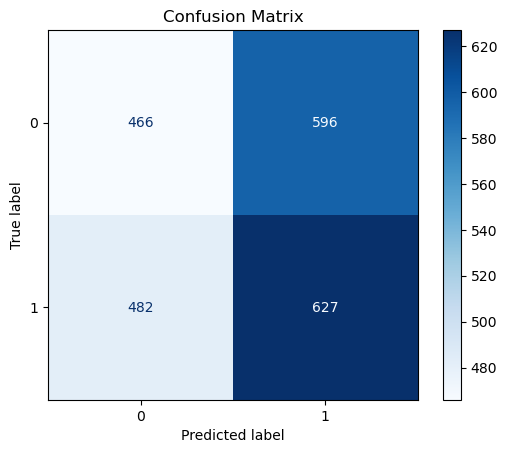

In [531]:
print_confusion_matrix(res["Target"],res["Predictions"])

Добавим некоторые признаки в датасет. Например скользящие средние на период:10,30,60,100,200(точнее на сколько цена отличается от ср знач за данный период).Также добавим колонки тренда за период(где 1 означает тренд на рост,а 0 означает тренд на падение).

In [593]:
moving_means=[14,30,60,120,180]

In [595]:
for i in moving_means:
    rolling_avg=forest_price.rolling(i).mean()
    forest_price[f"{i}_ratio_avg"]=forest_price["Close"]/rolling_avg["Close"]

    min_df=forest_price.rolling(i).min()
    forest_price[f"{i}_trend"]=(forest_price["Close"]>min_df["Close"]).astype(int)

In [629]:
forest_price

,Open,High,Low,Close,Volume,Change,Target,14_ratio_avg,14_trend,30_ratio_avg,30_trend,60_ratio_avg,60_trend,120_ratio_avg,120_trend,180_ratio_avg,180_trend
1,456.86,456.86,413.10,424.44,34483200,-7.19,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2,424.10,427.83,384.53,394.80,37919700,-6.98,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,394.67,423.30,389.88,408.90,36863600,3.57,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,408.08,412.43,393.18,398.82,26580100,-2.47,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
5,399.10,406.92,397.13,402.15,24127600,0.83,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,61168.32,61408.11,59815.25,60381.91,27625734377,-1.30,1,1.013937,1,0.985113,1,0.984117,1,0.949340,1,0.935708,1
3628,60380.95,64947.06,60372.05,64094.36,42530509233,6.15,1,1.072143,1,1.046408,1,1.043542,1,1.007760,1,0.992182,1
3629,64103.87,64513.79,63619.92,64178.99,21430585163,0.13,1,1.069427,1,1.048702,1,1.044247,1,1.009034,1,0.992668,1
3630,64176.37,64996.42,63833.52,64333.54,18827683555,0.24,0,1.064887,1,1.053280,1,1.045762,1,1.011343,1,0.994439,1


In [631]:
forest_price=forest_price.dropna()

In [633]:
forest_price

,Open,High,Low,Close,Volume,Change,Target,14_ratio_avg,14_trend,30_ratio_avg,30_trend,60_ratio_avg,60_trend,120_ratio_avg,120_trend,180_ratio_avg,180_trend
180,285.68,294.11,285.68,290.59,21516100,1.47,0,1.024593,1,1.106410,1,1.182087,1,1.009373,1,0.919764,1
181,290.60,292.36,284.37,285.51,21497200,-1.75,0,1.005717,1,1.080119,1,1.155359,1,0.994662,1,0.905898,1
182,285.07,285.34,249.87,256.30,57008000,-10.23,1,0.906654,0,0.966875,1,1.033182,1,0.895993,1,0.815207,1
183,255.88,264.24,248.64,260.93,52732000,1.81,1,0.926603,1,0.982203,1,1.048283,1,0.915368,1,0.832109,1
184,260.96,264.85,259.16,261.75,18456700,0.31,0,0.932108,1,0.982157,1,1.048286,1,0.920832,1,0.836756,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,61168.32,61408.11,59815.25,60381.91,27625734377,-1.30,1,1.013937,1,0.985113,1,0.984117,1,0.949340,1,0.935708,1
3628,60380.95,64947.06,60372.05,64094.36,42530509233,6.15,1,1.072143,1,1.046408,1,1.043542,1,1.007760,1,0.992182,1
3629,64103.87,64513.79,63619.92,64178.99,21430585163,0.13,1,1.069427,1,1.048702,1,1.044247,1,1.009034,1,0.992668,1
3630,64176.37,64996.42,63833.52,64333.54,18827683555,0.24,0,1.064887,1,1.053280,1,1.045762,1,1.011343,1,0.994439,1


In [639]:
new_forest=forest_price.drop(columns=["Open","High","Low","Close","Volume"])
new_forest

,Change,Target,14_ratio_avg,14_trend,30_ratio_avg,30_trend,60_ratio_avg,60_trend,120_ratio_avg,120_trend,180_ratio_avg,180_trend
180,1.47,0,1.024593,1,1.106410,1,1.182087,1,1.009373,1,0.919764,1
181,-1.75,0,1.005717,1,1.080119,1,1.155359,1,0.994662,1,0.905898,1
182,-10.23,1,0.906654,0,0.966875,1,1.033182,1,0.895993,1,0.815207,1
183,1.81,1,0.926603,1,0.982203,1,1.048283,1,0.915368,1,0.832109,1
184,0.31,0,0.932108,1,0.982157,1,1.048286,1,0.920832,1,0.836756,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3627,-1.30,1,1.013937,1,0.985113,1,0.984117,1,0.949340,1,0.935708,1
3628,6.15,1,1.072143,1,1.046408,1,1.043542,1,1.007760,1,0.992182,1
3629,0.13,1,1.069427,1,1.048702,1,1.044247,1,1.009034,1,0.992668,1
3630,0.24,0,1.064887,1,1.053280,1,1.045762,1,1.011343,1,0.994439,1


Снова постараемся подобрать наилучшие параметры для дерева только уже на наовых данных

In [668]:
new_forest_params={"n_estimators":range(100,200,10),
              "min_samples_split":range(20,100,10)}

In [670]:
search=GridSearchCV(forest,param_grid=new_forest_params)

In [672]:
X=new_forest.drop(columns=["Target"])
y=new_forest.Target

In [716]:
X_f=forest_price.drop(columns=["Target"])
y_f=forest_price.Target

In [720]:
X_train,X_test,y_train,y_test=split_data(X_f,y_f)

In [722]:
search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(20, 100, 10),
                         'n_estimators': range(100, 200, 10)})

In [724]:
search.best_params_

{'min_samples_split': 20, 'n_estimators': 110}

In [726]:
ran_for=RandomForestClassifier( min_samples_split=20,
    n_estimators=110,
    random_state=42)

In [728]:
ran_for.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=20, n_estimators=110, random_state=42)

In [732]:
ran_for.score(X_test,y_test)

0.5289473684210526

Сделаем presicion более точным увеличив вероятность соотнесия предсказания к классу

In [734]:
def predictions(train,test,model):
    X_train=train.drop(columns=["Target"])
    X_test=test.drop(columns=["Target"])
    y_train=train.Target
    y_test=test.Target
    model.fit(X_train,y_train)
    predictions=model.predict_proba(X_test)[:,1]
    predictions[predictions>=0.6]=1
    predictions[predictions<0.6]=0
    predictions=pd.Series(predictions,index=y_test.index,name="Predictions")
    combined=pd.concat([y_test,predictions],axis=1)
    return combined

In [774]:
new_res=back_test(ran_for,new_forest)
new_res

,Target,Predictions
1640,1,0.0
1641,0,0.0
1642,1,0.0
1643,1,0.0
1644,1,0.0
...,...,...
3627,1,0.0
3628,1,0.0
3629,1,0.0
3630,0,0.0


In [776]:
new_res["Predictions"].value_counts()

Predictions
0.0    1463
1.0     529
Name: count, dtype: int64

In [778]:
new_res["Target"].value_counts()

Target
1    1018
0     974
Name: count, dtype: int64

In [780]:
print(classification_report(new_res["Target"],new_res["Predictions"]))

              precision    recall  f1-score   support

           0       0.49      0.74      0.59       974
           1       0.52      0.27      0.36      1018

    accuracy                           0.50      1992
   macro avg       0.51      0.51      0.48      1992
weighted avg       0.51      0.50      0.47      1992



In [782]:
precision_score(new_res["Target"],new_res["Predictions"])

0.5236294896030246

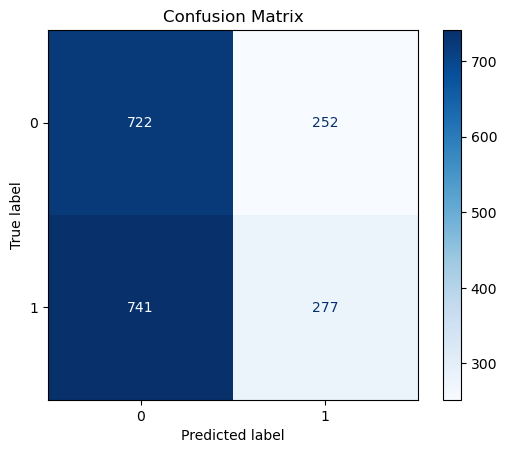

In [784]:
print_confusion_matrix(new_res["Target"],new_res["Predictions"])

Рассмотрим модель с градиентным бустингом

In [750]:
from xgboost import XGBClassifier

In [840]:
boost_params={"n_estimators":range(200,300,10),
             "max_depth":[6,10,12],
             "learning_rate":[0.05,0.1]}

In [854]:
boost_search=search=GridSearchCV(boost_clf,param_grid=boost_params)

In [856]:
X_train,X_test,y_train,y_test=split_data(X,y)

In [858]:
boost_search.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [6, 10, 12],
                         'n_estimators': range(200, 300, 10)})

In [860]:
boost_search.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 220}

In [864]:
best_boost=XGBClassifier(random_state=42,learning_rate=0.1,n_estimators=220,max_depth=6)

In [874]:
x_res=back_test(best_boost,new_forest)

In [876]:
x_res["Predictions"].value_counts()

Predictions
0.0    1134
1.0     858
Name: count, dtype: int64

In [880]:
x_res["Target"].value_counts()

Target
1    1018
0     974
Name: count, dtype: int64

In [882]:
print(classification_report(x_res["Target"],x_res["Predictions"]))

              precision    recall  f1-score   support

           0       0.51      0.59      0.55       974
           1       0.54      0.45      0.49      1018

    accuracy                           0.52      1992
   macro avg       0.52      0.52      0.52      1992
weighted avg       0.52      0.52      0.52      1992



In [884]:
precision_score(x_res["Target"],x_res["Predictions"])

0.5372960372960373

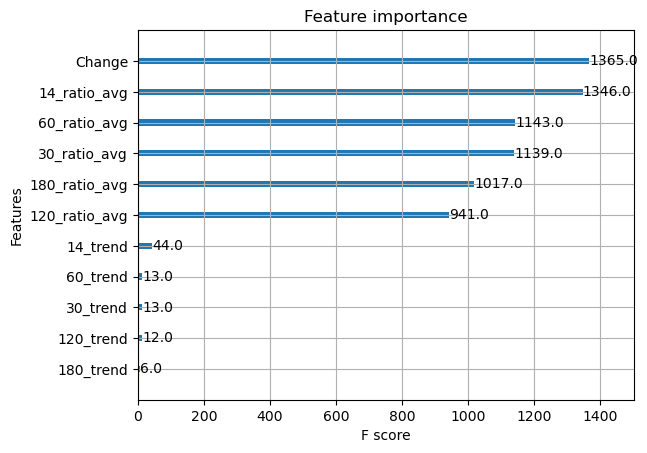

In [886]:
from xgboost import plot_importance 
import matplotlib.pyplot as plt
plot_importance(best_boost)
plt.show()